In [9]:
pip install --user yfinance


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: C:\Python310\python.exe -m pip install --upgrade pip


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import yfinance as yfin


In [12]:

start = '2010-09-18'  # Ensure dates are in YYYY-MM-DD format
end = '2020-09-18'

# Download AAPL stock data with explicit start and end dates
aapl_data = yfin.download('AAPL', start=start, end=end)

# Access the DataFrame containing historical data
df = aapl_data.reset_index()  # Reset index for easier manipulation
df.head()  # Display the first few rows of the DataFrame

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-20,9.860000,10.135000,9.851786,10.115357,8.563655,658677600
1,2010-09-21,10.137857,10.262500,10.099643,10.134643,8.579986,668074400
2,2010-09-22,10.096786,10.285000,10.086071,10.276786,8.700320,585289600
3,2010-09-23,10.226071,10.455714,10.214286,10.318571,8.735698,786116800
4,2010-09-24,10.432143,10.483214,10.376786,10.440000,8.838496,649488000


In [13]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2512,2020-09-11,114.570000,115.230003,110.000000,112.000000,109.726746,180860300
2513,2020-09-14,114.720001,115.930000,112.800003,115.360001,113.018532,140150100
2514,2020-09-15,118.330002,118.830002,113.610001,115.540001,113.194893,184642000
2515,2020-09-16,115.230003,116.000000,112.040001,112.129997,109.854095,154679000
2516,2020-09-17,109.720001,112.199997,108.709999,110.339996,108.100433,178011000


In [14]:
df=df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-09-20,9.860000,10.135000,9.851786,10.115357,8.563655,658677600
1,1,2010-09-21,10.137857,10.262500,10.099643,10.134643,8.579986,668074400
2,2,2010-09-22,10.096786,10.285000,10.086071,10.276786,8.700320,585289600
3,3,2010-09-23,10.226071,10.455714,10.214286,10.318571,8.735698,786116800
4,4,2010-09-24,10.432143,10.483214,10.376786,10.440000,8.838496,649488000


In [15]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,9.860000,10.135000,9.851786,10.115357,658677600
1,1,10.137857,10.262500,10.099643,10.134643,668074400
2,2,10.096786,10.285000,10.086071,10.276786,585289600
3,3,10.226071,10.455714,10.214286,10.318571,786116800
4,4,10.432143,10.483214,10.376786,10.440000,649488000


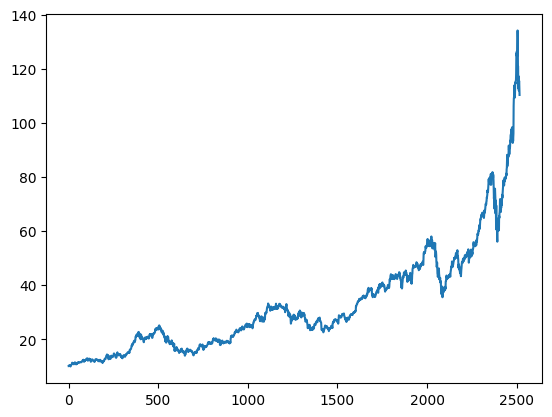

In [16]:
plt.plot(df.Close)

In [17]:
df

,index,Open,High,Low,Close,Volume
0,0,9.860000,10.135000,9.851786,10.115357,658677600
1,1,10.137857,10.262500,10.099643,10.134643,668074400
2,2,10.096786,10.285000,10.086071,10.276786,585289600
3,3,10.226071,10.455714,10.214286,10.318571,786116800
4,4,10.432143,10.483214,10.376786,10.440000,649488000
...,...,...,...,...,...,...
2512,2512,114.570000,115.230003,110.000000,112.000000,180860300
2513,2513,114.720001,115.930000,112.800003,115.360001,140150100
2514,2514,118.330002,118.830002,113.610001,115.540001,184642000
2515,2515,115.230003,116.000000,112.040001,112.129997,154679000


In [18]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    94.750100
2513    95.213450
2514    95.681275
2515    96.095150
2516    96.490625
Name: Close, Length: 2517, dtype: float64

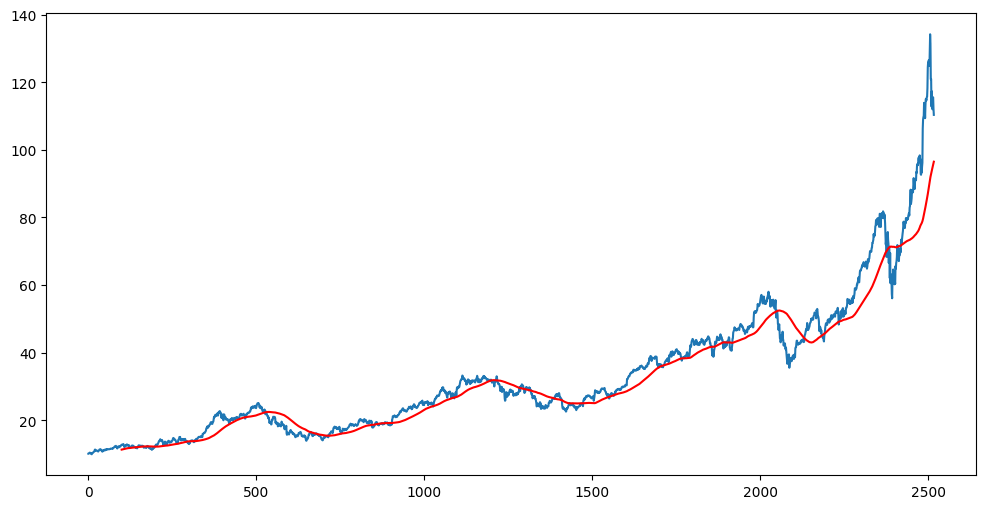

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [20]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    83.109175
2513    83.355612
2514    83.598512
2515    83.825100
2516    84.046600
Name: Close, Length: 2517, dtype: float64

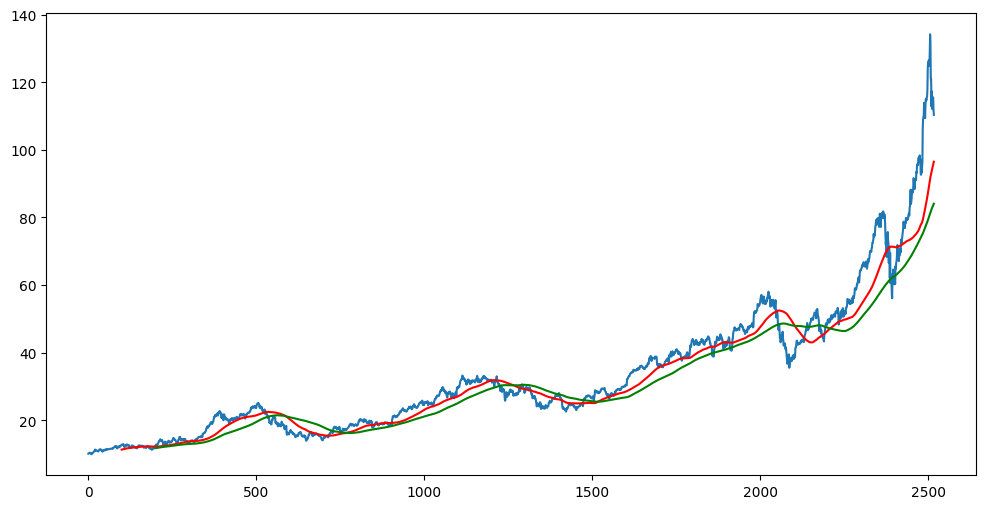

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [22]:
df.shape

(2517, 6)

In [23]:
#Splitting Data into Training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [24]:
data_training.head()

,Close
0,10.115357
1,10.134643
2,10.276786
3,10.318571
4,10.440000


In [25]:
data_testing.head()

,Close
1761,39.667500
1762,39.682499
1763,39.017502
1764,38.347500
1765,37.972500


In [26]:
data_training.tail()

,Close
1756,40.375000
1757,40.215000
1758,39.912498
1759,39.570000
1760,39.970001


In [27]:
data_testing.tail()

,Close
2512,112.000000
2513,115.360001
2514,115.540001
2515,112.129997
2516,110.339996


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [29]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.0052776 ],
       [0.00589848],
       [0.01047473],
       ...,
       [0.96458582],
       [0.9535592 ],
       [0.9664371 ]])

In [30]:
data_training_array.shape

(1761, 1)

In [31]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train) 
    

In [32]:
#MACHINE LEARNING MODEL

In [33]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [34]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
#1 because we are working for only close column otherwise it may not be 1
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

#all above are the 4 layers and now we add dense layer to add all4 layers
#units=1 because we have to predict only one value ie closing price
model.add(Dense(units=1))

In [35]:
model.summary()
#summary of LSTM MODEL

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [36]:
#Now compile the model and optimiser will be adam
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 12s 180ms/step - loss: 0.0442
Epoch 2/50
52/52 [==============================] - 10s 190ms/step - loss: 0.0114
Epoch 3/50
52/52 [==============================] - 10s 197ms/step - loss: 0.0089
Epoch 4/50
52/52 [==============================] - 11s 209ms/step - loss: 0.0081
Epoch 5/50
52/52 [==============================] - 11s 219ms/step - loss: 0.0070
Epoch 6/50
52/52 [==============================] - 11s 220ms/step - loss: 0.0070
Epoch 7/50
52/52 [==============================] - 11s 210ms/step - loss: 0.0063
Epoch 8/50
52/52 [==============================] - 12s 222ms/step - loss: 0.0059
Epoch 9/50
52/52 [==============================] - 11s 217ms/step - loss: 0.0074
Epoch 10/50
52/52 [==============================] - 11s 218ms/step - loss: 0.0054
Epoch 11/50
52/52 [==============================] - 11s 214ms/step - loss: 0.0059
Epoch 12/50
52/52 [==============================] - 11s 214ms/step - loss: 0.0058
Epoch 13/50
5

In [38]:
model.save('keras_model.h5')

In [39]:
data_testing.head()

,Close
1761,39.667500
1762,39.682499
1763,39.017502
1764,38.347500
1765,37.972500


In [40]:
data_training.tail(100)

,Close
1661,35.919998
1662,35.947498
1663,35.912498
1664,36.645000
1665,36.877499
...,...
1756,40.375000
1757,40.215000
1758,39.912498
1759,39.570000


In [41]:
#like for predicting the value of 2114 index we need value of previous 100 days
#for this we have to fetch training data to get data of previous 100 days(these 100 values must be append)

past_100_days=data_training.tail(100)

In [42]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Anupam Shukla\AppData\Local\Temp\ipykernel_12536\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [43]:
final_df.head()

,Close
0,35.919998
1,35.947498
2,35.912498
3,36.645000
4,36.877499


In [44]:
#Now again i have to apply scaling down because this has not been scale down
input_data=scaler.fit_transform(final_df)
input_data

array([[3.77662118e-03],
       [4.05543551e-03],
       [3.70058442e-03],
       [1.11271633e-02],
       [1.34843801e-02],
       [1.23437901e-02],
       [1.10004225e-02],
       [1.71596705e-02],
       [2.74250195e-02],
       [2.99090158e-02],
       [2.80586849e-02],
       [2.98076077e-02],
       [3.52571535e-02],
       [3.42432656e-02],
       [3.36603043e-02],
       [2.04293671e-02],
       [2.62337254e-02],
       [2.75517603e-02],
       [2.99090158e-02],
       [2.94274239e-02],
       [2.82614625e-02],
       [2.96048301e-02],
       [2.89458320e-02],
       [2.90979055e-02],
       [2.67913541e-02],
       [2.78559073e-02],
       [3.36096002e-02],
       [2.97569036e-02],
       [3.10749385e-02],
       [3.34068226e-02],
       [3.24436775e-02],
       [1.72103359e-02],
       [8.18694646e-03],
       [1.11524960e-02],
       [7.52794834e-03],
       [5.32276636e-03],
       [2.02777577e-04],
       [1.05188306e-02],
       [7.14772588e-03],
       [9.32753649e-03],


In [45]:
#now u see it is scale down between 0 to 1

In [46]:
input_data.shape

(856, 1)

In [47]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    


In [48]:
#now again convert it into numpy arrays
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [49]:
# Making Predictions

y_predicted=model.predict(x_test)

24/24 [==============================] - 2s 49ms/step


In [50]:
y_predicted.shape

(756, 1)

In [51]:
y_test

array([0.04177121, 0.04192329, 0.03518112, 0.0283882 , 0.02458621,
       0.02118977, 0.02775454, 0.03051731, 0.02810939, 0.0302385 ,
       0.02945276, 0.03115098, 0.02861631, 0.03345753, 0.03322942,
       0.03459812, 0.03475019, 0.03639774, 0.03500367, 0.037513  ,
       0.04483817, 0.04633361, 0.04453399, 0.03495297, 0.03563734,
       0.03543456, 0.03779182, 0.03604289, 0.03857755, 0.05287304,
       0.06217525, 0.06805564, 0.06260614, 0.06569843, 0.07682559,
       0.08126125, 0.08268065, 0.08630524, 0.08539276, 0.0823258 ,
       0.08055155, 0.07388537, 0.06815705, 0.07327708, 0.07086912,
       0.07043823, 0.07844777, 0.08306087, 0.08308621, 0.08085569,
       0.07827037, 0.0691709 , 0.07517808, 0.07315034, 0.06998201,
       0.06957646, 0.06797961, 0.06876538, 0.06889209, 0.07725648,
       0.07479785, 0.07624263, 0.07611589, 0.08055155, 0.08676146,
       0.08199628, 0.08151473, 0.08318758, 0.08318758, 0.07193371,
       0.07200975, 0.07322637, 0.06853724, 0.07621726, 0.07614

In [52]:
y_predicted

array([[0.13975337],
       [0.13973129],
       [0.1396909 ],
       [0.13963038],
       [0.13954507],
       [0.13942969],
       [0.13927954],
       [0.13909578],
       [0.13888407],
       [0.13865085],
       [0.13840431],
       [0.13815245],
       [0.13790353],
       [0.1376637 ],
       [0.13744023],
       [0.13723935],
       [0.13706651],
       [0.13692528],
       [0.13681847],
       [0.13674673],
       [0.13671012],
       [0.1367112 ],
       [0.13675207],
       [0.1368322 ],
       [0.13694417],
       [0.13707907],
       [0.13722774],
       [0.13738285],
       [0.13753766],
       [0.13768756],
       [0.13783601],
       [0.13799274],
       [0.13817036],
       [0.13837478],
       [0.13860926],
       [0.13888444],
       [0.13921362],
       [0.1396012 ],
       [0.14006081],
       [0.1405983 ],
       [0.1412069 ],
       [0.14186972],
       [0.14255622],
       [0.14322875],
       [0.14385578],
       [0.14441088],
       [0.14487451],
       [0.145

In [53]:
# Now i will scale it up for that i have to find from how much factor i have scale it down
scaler.scale_

array([0.01013865])

In [54]:
scale_factor=1/0.00682769
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

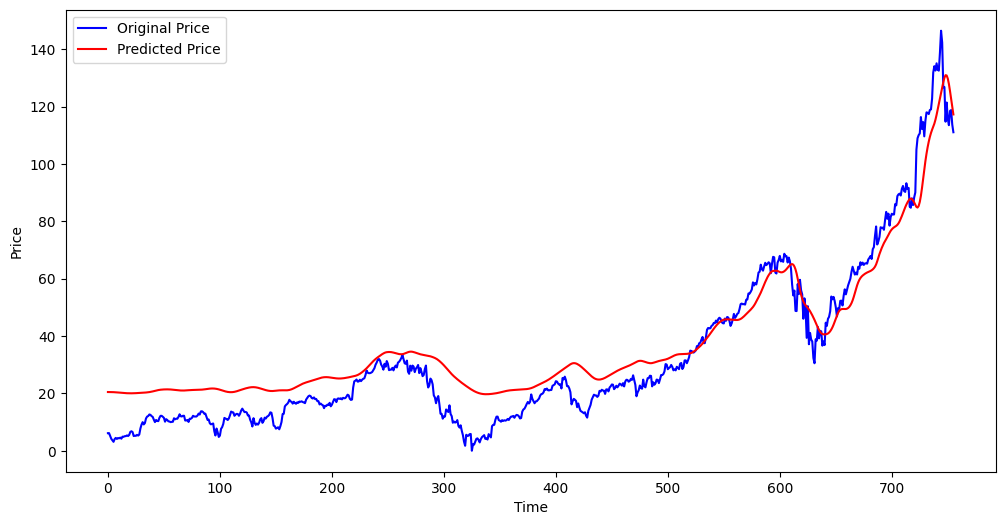

In [55]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [56]:
# We can't say it is perfected prediction of stock but it gives good stock trend